#

# Importing Python packages

In [362]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

# PART - 1 Identify providers that overcharge for cretain procedures or regions where procedures are to expensive

# Import all csv files

In [363]:
inpat_summ = pd.read_csv('Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')
outpat_summ = pd.read_csv('Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')
p_chrg_inpat = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
p_chrg_outpat = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [364]:
p_chrg_inpat.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [365]:
# Data cleaning and mining

In [366]:
# for Medicare Charge Inpatient

In [367]:
p_chrg_inpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [368]:
p_chrg_inpat.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.000000,110092.000000,250007.000000,380075.00000,670077.0000
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.000000,27261.000000,44309.000000,72901.00000,99835.0000
Total Discharges,163065.0,42.776304,51.104042,11.000000,17.000000,27.000000,49.00000,3383.0000
Average Covered Charges,163065.0,36133.958434,35065.365905,2459.400000,15947.166670,25245.823530,43232.59259,929118.9091
Average Total Payments,163065.0,9707.477867,7664.642652,2673.000000,5234.500000,7214.100000,11286.40000,156158.1818
Average Medicare Payments,163065.0,8494.495174,7309.467247,1148.909091,4192.354839,6158.465116,10056.88235,154620.8182


In [369]:
p_chrg_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [370]:
p_chrg_outpat.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.921747,152729.927698,10001.00000,140043.000000,260091.000000,390101.000000,670061.000000
Provider Zip Code,43372.0,49041.022434,27497.899751,1040.00000,28645.000000,46342.000000,73101.000000,99801.000000
Outpatient Services,43372.0,587.980955,3280.397168,11.00000,42.000000,128.000000,347.000000,219042.000000
Average Estimated Submitted Charges,43372.0,1473.994047,1837.530791,12.64375,284.610498,709.995188,2102.121346,32105.636300
Average Total Payments,43372.0,265.425586,261.260146,7.30500,74.627714,139.298570,394.211316,2062.470526


# Part - 1 Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

# Part - 1A High Cost variation procedures for inpatient

In [431]:
grpd = p_chrg_inpat[['Average Total Payments', 'DRG Definition']].groupby('DRG Definition').agg(['max', 'mean']).add_prefix('m_')

In [432]:
grpd.head()

m_Average Total Payments  \
                                                                      m_max   
DRG Definition                                                                
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                        18420.56250   
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...              25519.43750   
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              50882.40625   
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              26510.15842   
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              14744.05882   

                                                                  
                                                          m_mean  
DRG Definition                                                    
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             6960.537900  
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...   6706.280366  
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...  13263.827101  
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...   7922.675347  
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...   5713.989142

In [433]:
grpd.reset_index(inplace = True)

In [434]:
grpd.head()

DRG Definition m_Average Total Payments  \
                                                                        m_max   
0           039 - EXTRACRANIAL PROCEDURES W/O CC/MCC              18420.56250   
1  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...              25519.43750   
2  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...              50882.40625   
3  065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...              26510.15842   
4  066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...              14744.05882   

                 
         m_mean  
0   6960.537900  
1   6706.280366  
2  13263.827101  
3   7922.675347  
4   5713.989142

In [435]:
grpd['cost_var_inpat'] = grpd['m_Average Total Payments']['m_max'] - grpd['m_Average Total Payments']['m_mean'] 

In [436]:
grpd.sort_values(by='cost_var_inpat', ascending=False).head()

DRG Definition  \
                                                        
21  207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...   
66        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC   
91  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...   
67  469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...   
92   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS   

   m_Average Total Payments               cost_var_inpat  
                      m_max        m_mean                 
21              156158.1818  38588.924930  117569.256870  
66              131187.3571  27778.675288  103408.681812  
91              140255.2667  40315.965619   99939.301081  
67              100018.3333  22531.265543   77487.067757  
92              119028.9091  44259.489776   74769.419324

# Result

Three Procedures with highest cost variation for inpatients are :

1. 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS is 133846.64334 Dollars. 
2. 853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC is 118142.93337 Dollars
3. 460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC is 114415.53892 Dollars

# Part - 1A High Cost variation procedures for outpatient

In [484]:
grpd1 = p_chrg_outpat[['Average Total Payments', 'APC']].groupby('APC').var()

In [478]:
grpd1.reset_index(inplace = True)

In [485]:
grpd1.head()

,Average Total Payments
APC,
0012 - Level I Debridement & Destruction,20.616822
0013 - Level II Debridement & Destruction,70.168587
0015 - Level III Debridement & Destruction,115.470508
0019 - Level I Excision/ Biopsy,1254.190455
0020 - Level II Excision/ Biopsy,3716.470897


In [454]:
grpd1['cost_var_outpat'] = grpd1['m_Average Total Payments']['m_max'] - grpd1['m_Average Total Payments']['m_mean'] 

In [483]:
grpd1.sort_values(by='Average Total Payments', ascending=False).head()

KeyError: 'Average Total Payments'

# Result

Three Procedures with highest cost variation for outpatients are :

1. 0377 - Level II Cardiac Imaging is 133846.643340 Dollars. 
2. 0692 - Level II Electronic Analysis of Devices is 75983.897234 Dollars
3. 0690 - Level I Electronic Analysis of Devices is 73898.934474 Dollars

# Part - 1B Highest Cost-Claims by Providers for Inpatients

In [428]:
grpd1b_in = p_chrg_inpat[['DRG Definition', 'Provider Id', 'Average Covered Charges']].groupby(['Provider Id']).max()

In [429]:
grpd1b_in.sort_values(by='Average Covered Charges', ascending=False).head()

,DRG Definition,Average Covered Charges
Provider Id,,
50441,948 - SIGNS & SYMPTOMS W/O MCC,929118.9091
50195,948 - SIGNS & SYMPTOMS W/O MCC,918023.1818
50367,948 - SIGNS & SYMPTOMS W/O MCC,628730.4000
390027,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,613926.6071
310118,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,602981.3784


In [430]:
p_chrg_inpat[(((p_chrg_inpat['Provider Id']==50195) & (p_chrg_inpat['Average Covered Charges']==918023.1818)) | ((p_chrg_inpat['Provider Id']==50441) & (p_chrg_inpat['Average Covered Charges']==929118.9091)) | ((p_chrg_inpat['Provider Id']==50367) & (p_chrg_inpat['Average Covered Charges']==628730.4000)))].sort_values(by='Average Covered Charges', ascending=False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Claim-Reimb
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,929118.9091,156158.1818,154620.8182,772960.7273
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,918023.1818,119113.0000,113462.0909,798910.1818
151380,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,50367,NORTHBAY MEDICAL CENTER,1200 B GALE WILSON BLVD,FAIRFIELD,CA,94533,CA - Contra Costa County,20,628730.4000,84617.9000,83534.6500,544112.5000


# Result

Top 3 Providers with highest claims for inpatients are : 
    
1. Provider ID - 50441, Provider Name - STANFORD HOSPITAL, DRG Definition - 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
2. Provider ID - 50195, Provider Name - WASHINGTON HOSPITAL, DRG Definition - 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
3. Provider ID - 50367, Provider Name - NORTHBAY MEDICAL CENTER, DRG Definition - 870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS

# Part - 1B Highest Cost-Claims by Providers for Outpatients

In [385]:
grpd1b_out = p_chrg_outpat[['Provider Id', 'Average  Estimated Submitted Charges']].groupby(['Provider Id']).max()

In [386]:
grpd1b_out.sort_values(by='Average  Estimated Submitted Charges', ascending=False).head()

,Average Estimated Submitted Charges
Provider Id,
100223,32105.63630
50764,32079.99067
100179,27625.39130
50739,26466.64500
50133,26084.48588


In [390]:
p_chrg_outpat[(((p_chrg_outpat['Provider Id']==100223) & (p_chrg_outpat['Average  Estimated Submitted Charges']==32105.6363)) | ((p_chrg_outpat['Provider Id']==50764) & (p_chrg_outpat['Average  Estimated Submitted Charges']==32079.99067)) | ((p_chrg_outpat['Provider Id']==100179) & (p_chrg_outpat['Average  Estimated Submitted Charges']==27625.39130)))].sort_values(by='Average  Estimated Submitted Charges', ascending=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
4983,0074 - Level IV Endoscopy Upper Airway,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEA,FL,32547,FL - Pensacola,11,32105.63630,1396.48
4939,0074 - Level IV Endoscopy Upper Airway,50764,SHASTA REGIONAL MEDICAL CENTER,1100 BUTTE ST,REDDING,CA,96001,CA - Redding,15,32079.99067,1833.50
4981,0074 - Level IV Endoscopy Upper Airway,100179,MEMORIAL HOSPITAL JACKSONVILLE,3625 UNIVERSITY BLVD S,JACKSONVILLE,FL,32216,FL - Jacksonville,23,27625.39130,1409.17


# Result

Top 3 Providers with highest claims for outpatients are : 
    
1. Provider ID - 100223, Provider Name - FORT WALTON BEACH MEDICAL CENTER, APC - 0074 - Level IV Endoscopy Upper Airway
2. Provider ID - 50764, Provider Name - SHASTA REGIONAL MEDICAL CENTER, APC - 0074 - Level IV Endoscopy Upper Airway
3. Provider ID - 100179, Provider Name - MEMORIAL HOSPITAL JACKSONVILLE, APC - 0074 - Level IV Endoscopy Upper Airway

# Part - 1C Highest Cost-Claims by Regions for Inpatients

In [391]:
grpd1c_in = p_chrg_inpat[['Provider State', 'Average Covered Charges']].groupby(['Provider State']).max()

In [393]:
grpd1c_in.sort_values(by='Average Covered Charges', ascending=False).head()

,Average Covered Charges
Provider State,
CA,929118.9091
PA,613926.6071
NJ,602981.3784
NY,517381.3333
TX,480539.6923


In [394]:
p_chrg_inpat[(((p_chrg_inpat['Provider State']=='CA') & (p_chrg_inpat['Average Covered Charges']==929118.9091)) | ((p_chrg_inpat['Provider State']=='PA') & (p_chrg_inpat['Average Covered Charges']==613926.6071)) | ((p_chrg_inpat['Provider State']=='NJ') & (p_chrg_inpat['Average Covered Charges']==602981.3784)))].sort_values(by='Average Covered Charges', ascending=False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,929118.9091,156158.18180,154620.81820
40330,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,390027,TEMPLE UNIVERSITY HOSPITAL,3401 NORTH BROAD STREET,PHILADELPHIA,PA,19140,PA - Philadelphia,28,613926.6071,80549.67857,67498.00000
40119,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,310118,MEADOWLANDS HOSPITAL MEDICAL CENTER,55 MEADOWLANDS PKWY,SECAUCUS,NJ,7094,NJ - Hackensack,37,602981.3784,55592.97297,45970.08108


# Result

Top 3 Regions with highest claims for inpatients are : 
    
1. Provider ID - 50441, Provider Name - STANFORD HOSPITAL, DRG Definition - 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
2. Provider ID - 390027, Provider Name - TEMPLE UNIVERSITY HOSPITAL, DRG Definition - 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
3. Provider ID - 310118, Provider Name - MEADOWLANDS HOSPITAL MEDICAL CENTER, DRG Definition - 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS

# Part - 1C Highest Cost-Claims by Regions for Outpatients

In [395]:
grpd1c_out = p_chrg_outpat[['Provider State', 'Average  Estimated Submitted Charges']].groupby(['Provider State']).max()

In [396]:
grpd1c_out.sort_values(by='Average  Estimated Submitted Charges', ascending=False).head()

,Average Estimated Submitted Charges
Provider State,
FL,32105.63630
CA,32079.99067
TX,19060.80769
MA,18735.33583
AL,17970.86184


In [397]:
p_chrg_outpat[(((p_chrg_outpat['Provider State']=='FL') & (p_chrg_outpat['Average  Estimated Submitted Charges']==32105.6363)) | ((p_chrg_outpat['Provider State']=='CA') & (p_chrg_outpat['Average  Estimated Submitted Charges']==32079.99067)) | ((p_chrg_outpat['Provider State']=='TX') & (p_chrg_outpat['Average  Estimated Submitted Charges']==19060.80769)))].sort_values(by='Average  Estimated Submitted Charges', ascending=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
4983,0074 - Level IV Endoscopy Upper Airway,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEA,FL,32547,FL - Pensacola,11,32105.63630,1396.48
4939,0074 - Level IV Endoscopy Upper Airway,50764,SHASTA REGIONAL MEDICAL CENTER,1100 BUTTE ST,REDDING,CA,96001,CA - Redding,15,32079.99067,1833.50
5269,0074 - Level IV Endoscopy Upper Airway,450299,COLLEGE STATION MEDICAL CENTER,1604 ROCK PRAIRIE ROAD,COLLEGE STATION,TX,77842,TX - Bryan,13,19060.80769,1439.10


# Result

Top 3 Regions with highest claims for outpatients are : 
    
1. Provider ID - 100223, Provider Name - FORT WALTON BEACH MEDICAL CENTER, APC - 0074 - Level IV Endoscopy Upper Airway
2. Provider ID - 50764, Provider Name - SHASTA REGIONAL MEDICAL CENTER, APC - 0074 - Level IV Endoscopy Upper Airway
3. Provider ID - 450299, Provider Name - COLLEGE STATION MEDICAL CENTER, APC - 0074 - Level IV Endoscopy Upper Airway 

#  Part - 1D Highest number of procedures and Largest difference between claims and Reimbursements for Inpatients.

In [401]:
p_chrg_inpat['DRG Definition'].value_counts().head(4)

194 - SIMPLE PNEUMONIA & PLEURISY W CC                          3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                 2989
292 - HEART FAILURE & SHOCK W CC                                2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC    2950
Name: DRG Definition, dtype: int64

# Result

The 3 highest number of procedures for inpatients are :

1. DRG Definition - 194 - SIMPLE PNEUMONIA & PLEURISY W CC, Count = 3023
2. DRG Definition - 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC, Count = 2989
3. DRG Definition - 292 - HEART FAILURE & SHOCK W CC, Count = 2953

In [405]:
p_chrg_inpat['Claim-Reimb'] = (p_chrg_inpat['Average Covered Charges'] - p_chrg_inpat['Average Total Payments'])

In [407]:
p_chrg_inpat.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Claim-Reimb
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,32125.416667


In [409]:
p_chrg_inpat[p_chrg_inpat['Claim-Reimb'] == p_chrg_inpat['Claim-Reimb'].max()]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Claim-Reimb
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,918023.1818,119113.0,113462.0909,798910.1818


#  Result

The largest difference between claim and reimbursement for inpatients is $ 798910.1818 for procedure 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS and Provider Id = 50195, Provider Name = WASHINGTON HOSPITAL

#  Part - 1D Highest number of procedures and Largest difference between claims and Reimbursements for Outpatients.

In [402]:
p_chrg_outpat['APC'].value_counts().head(4)

0267 - Level III Diagnostic and Screening Ultrasound                                     2998
0269 - Level II Echocardiogram Without Contrast                                          2898
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    2855
0265 - Level I Diagnostic and Screening Ultrasound                                       2739
Name: APC, dtype: int64

# Result

The 3 highest number of procedures for outpatients are :

1. APC - 0267 - Level III Diagnostic and Screening Ultrasound, Count = 2998
2. APC - 0269 - Level II Echocardiogram Without Contrast, Count = 2898
3. APC - 0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast, Count = 2855

In [411]:
p_chrg_outpat['Claim-Reimb'] = (p_chrg_outpat['Average  Estimated Submitted Charges'] - p_chrg_outpat['Average Total Payments'])

In [412]:
p_chrg_outpat.head(3)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Claim-Reimb
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435,56.176522
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,112.965895
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841,35.593569


In [413]:
p_chrg_outpat[p_chrg_outpat['Claim-Reimb'] == p_chrg_outpat['Claim-Reimb'].max()]

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Claim-Reimb
4983,0074 - Level IV Endoscopy Upper Airway,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEA,FL,32547,FL - Pensacola,11,32105.6363,1396.48,30709.1563


#  Result

The largest difference between claim and reimbursement for outpatients is $ 30709.1563 for procedure 0074 - Level IV Endoscopy Upper Airway and Provider Id = 100223, Provider Name = FORT WALTON BEACH MEDICAL CENTER

In [456]:
from matplotlib.backends.backend_pdf import PdfPages

In [457]:
unique=p_chrg_outpat[p_chrg_outpat.APC.duplicated()==False]

In [467]:
n = [unique.APC]

In [468]:
type(n)

list

In [469]:
n

[0                 0012 - Level I Debridement & Destruction
 291              0013 - Level II Debridement & Destruction
 1770            0015 - Level III Debridement & Destruction
 3304                       0019 - Level I Excision/ Biopsy
 3749                      0020 - Level II Excision/ Biopsy
 4809               0073 - Level III Endoscopy Upper Airway
 4904                0074 - Level IV Endoscopy Upper Airway
 5315                  0078 - Level III Pulmonary Treatment
 7619       0096 - Level II Noninvasive Physiologic Studies
 9508                      0203 - Level IV Nerve Injections
 9639                       0204 - Level I Nerve Injections
 11296                     0206 - Level II Nerve Injections
 12065                    0207 - Level III Nerve Injections
 14067    0209 - Level II Extended EEG, Sleep, and Cardi...
 16034    0265 - Level I Diagnostic and Screening Ultras...
 18773    0267 - Level III Diagnostic and Screening Ultr...
 21771      0269 - Level II Echocardiogr

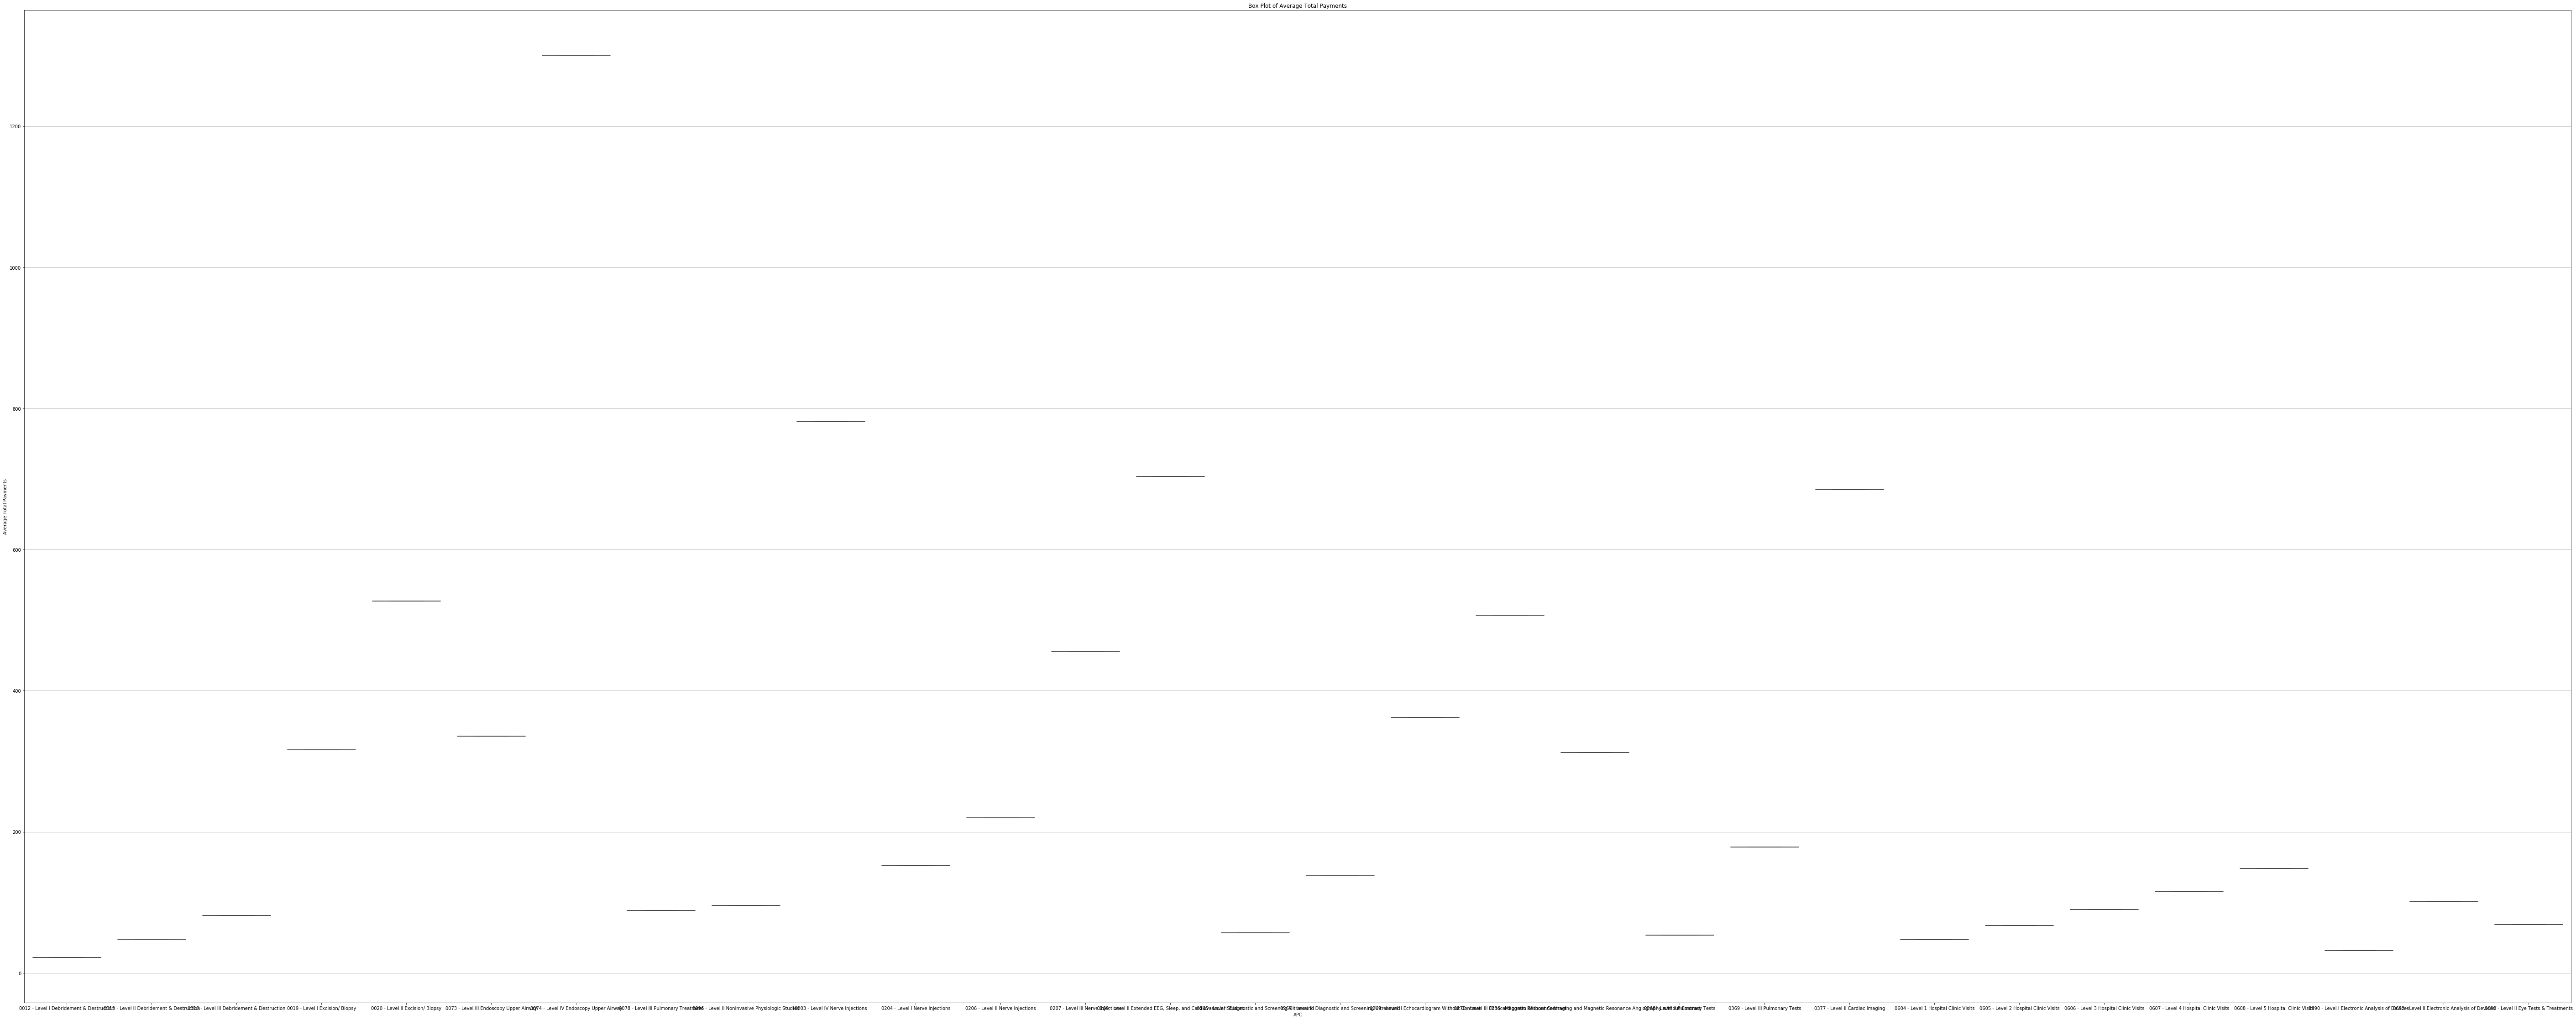

In [472]:
bp = PdfPages('BoxPlots with default Split.pdf')

for v in n:
    fig,axes = plt.subplots(figsize=(100,40))
    sns.boxplot(x=v, y='Average Total Payments', data = p_chrg_outpat).set_title(str('Box Plot of ') + str('Average Total Payments'))
    bp.savefig(fig)
bp.close()

In [419]:
g = p_chrg_inpat[['Average Total Payments', 'DRG Definition']].groupby('DRG Definition')